## impoting the libraries

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()
scaler=StandardScaler()

### Please wrtite in the Chat box as there is some issue with the speaker

# Importing DataSet

In [102]:
loan=pd.read_csv("C:\\Users\\Karan Mehta\\Desktop\\Data\\New_Data\\Credit_Risk_Train_data.csv").iloc[:,1:]
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Checking the missing values- Treatment (Categorical Data)

In [108]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [110]:
loan.info()
#Gender,Married,DependentsSelf_Employed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [124]:
loan["Gender"].value_counts()
loan["Married"].value_counts()
#loan["Dependents"].value_counts()
loan["Self_Employed"].value_counts()
#loan["Gender"].fillna("Male",inplace=True)
#loan["Married"].fillna("Yes",inplace=True)
#loan["Dependents"].fillna("0",inplace=True)
loan["Self_Employed"].fillna("No",inplace=True)

In [125]:
#loan["Dependents"].values
loan.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Missing value Treatment - Numerical Data

In [128]:
loan.median()
loan.fillna(loan.median(),inplace=True)

C:\Users\Karan Mehta\AppData\Local\Temp\ipykernel_14060\3047401352.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  loan.median()
C:\Users\Karan Mehta\AppData\Local\Temp\ipykernel_14060\3047401352.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  loan.fillna(loan.median(),inplace=True)


In [130]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# LabelEncoding the Columns

In [135]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [136]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [140]:
loan.columns
for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    loan[i]=le.fit_transform(loan[i])

In [143]:
loan.head()
loan["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

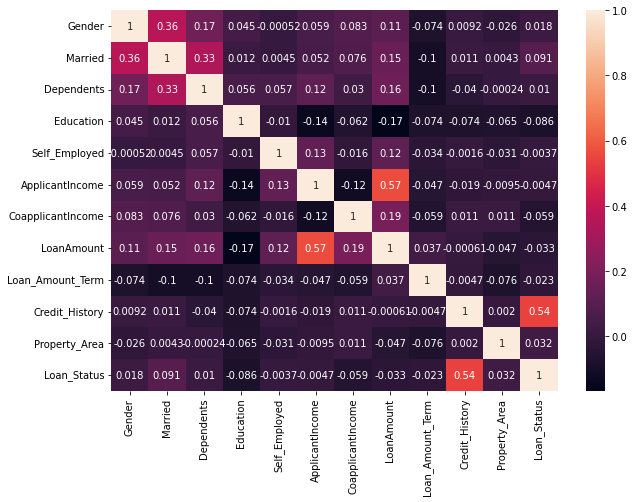

In [150]:
plt.figure(figsize=(10,7))
sns.heatmap(loan.corr(),annot=True)
#From the correlation plot, no column is highly correlated to one other, for 1st execution I am going to use all the columns

# Seperation of Data

In [182]:
loan
422/(422+192)

0.6872964169381107

In [159]:
X=loan.iloc[:,:11]
y=loan.iloc[:,11]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [166]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,s)

In [167]:
loan["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [168]:
422/(422+192)

0.6872964169381107

In [185]:
y_train.value_counts()
y_test.value_counts()

1    85
0    38
Name: Loan_Status, dtype: int64

In [186]:
337/(337+154)
85/(85+38)

0.6910569105691057

# Logistic Regression and Checking the Accuracy

In [193]:
model_log=log.fit(X_train,y_train)
pred_log=model_log.predict(X_test)
pred_log
accuracy_score(y_test,pred_log)

C:\Users\Karan Mehta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8617886178861789

# RandomForest Classifer and Checking the Accuracy1

In [217]:
rfc=RandomForestClassifier(n_estimators=51)
model_rfc=rfc.fit(X_train,y_train)
pred_rfc=model_rfc.predict(X_test)
pred_rfc
accuracy_score(y_test,pred_rfc)

0.8373983739837398

# Visualizing RandomForest Tree's

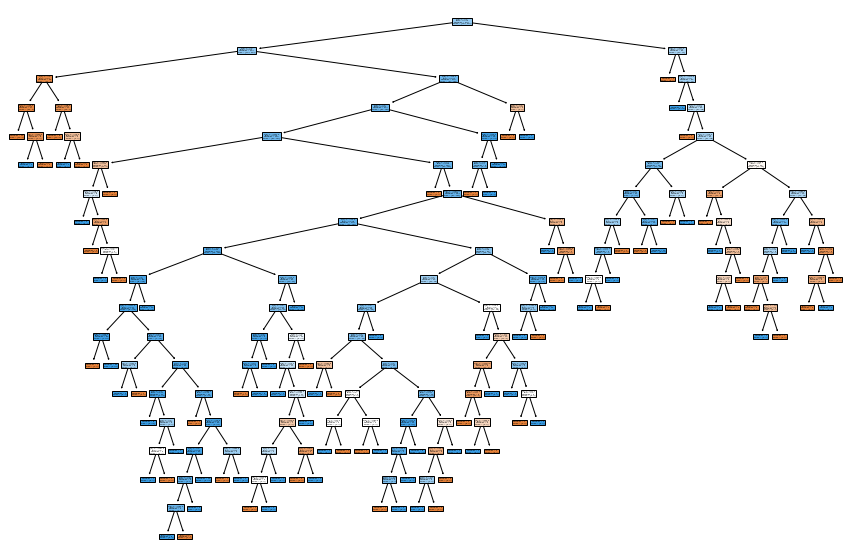

In [223]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(rfc.estimators_[30],filled=True);#max_depth

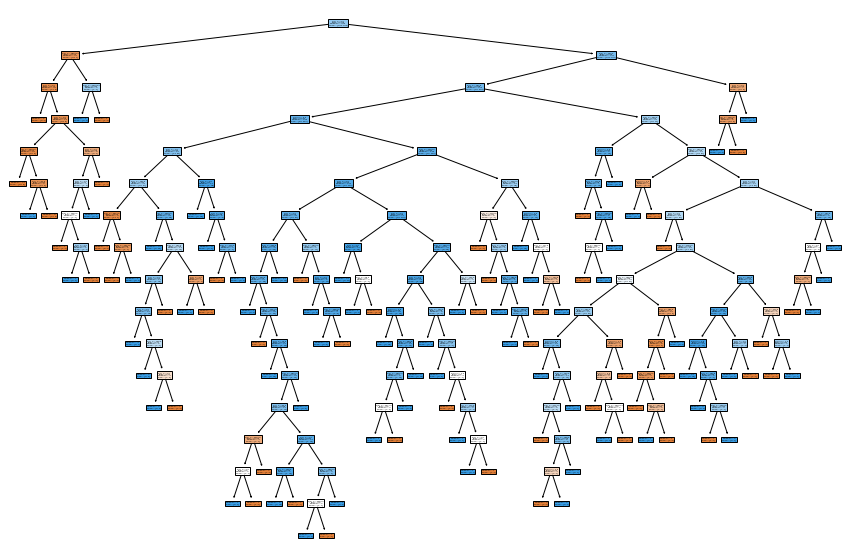

In [224]:
plt.figure(figsize=(15,10))
tree.plot_tree(rfc.estimators_[0],filled=True);#max_depth

# Getting Variable importance score from Logistic Regression and RandomForest

In [230]:
X_train.columns
log.coef_

array([[-7.24177058e-02,  3.32005345e-01,  1.20177950e-02,
        -4.16829113e-01, -7.25446033e-02, -1.55202916e-05,
        -5.21193037e-05, -2.25991069e-03, -1.95754093e-03,
         2.16358222e+00,  1.32670705e-01]])

In [245]:
x1=pd.DataFrame(X_train.columns,columns=["Names"])
x2=pd.DataFrame(log.coef_).transpose()

In [247]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [248]:
log.coef_

array([[-7.24177058e-02,  3.32005345e-01,  1.20177950e-02,
        -4.16829113e-01, -7.25446033e-02, -1.55202916e-05,
        -5.21193037e-05, -2.25991069e-03, -1.95754093e-03,
         2.16358222e+00,  1.32670705e-01]])

In [240]:
score_log=pd.concat([x1,x2],axis=1)
score_log

,Names,0
0,Gender,-0.072418
1,Married,0.332005
2,Dependents,0.012018
3,Education,-0.416829
4,Self_Employed,-0.072545
5,ApplicantIncome,-0.000016
6,CoapplicantIncome,-0.000052
7,LoanAmount,-0.002260
8,Loan_Amount_Term,-0.001958
9,Credit_History,2.163582


In [249]:
#score_log.rename(columns={0:"Scores"},inplace=True)
score_log.sort_values("Scores",ascending=False)

,Names,Scores
9,Credit_History,2.163582
1,Married,0.332005
10,Property_Area,0.132671
2,Dependents,0.012018
5,ApplicantIncome,-0.000016
6,CoapplicantIncome,-0.000052
8,Loan_Amount_Term,-0.001958
7,LoanAmount,-0.002260
0,Gender,-0.072418
4,Self_Employed,-0.072545


In [256]:
#RandomForest
rfc.feature_importances_

array([0.01814623, 0.02480096, 0.05387368, 0.0273848 , 0.01985119,
       0.20785492, 0.11723355, 0.20019624, 0.04612247, 0.23557619,
       0.04895977])

In [258]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [267]:
x1=pd.DataFrame(rfc.feature_importances_,columns=["Scores"])
x2=pd.DataFrame(X_train.columns,columns=["Names"])
score_rfc=pd.concat([x2,x1],axis=1)

In [271]:
#RandomForest
score_rfc.sort_values("Scores",ascending=False).head()

,Names,Scores
9,Credit_History,0.235576
5,ApplicantIncome,0.207855
7,LoanAmount,0.200196
6,CoapplicantIncome,0.117234
2,Dependents,0.053874


In [275]:
#Logistic Regression
score_log.sort_values("Scores",ascending=False).head()["Names"].values

array(['Credit_History', 'Married', 'Property_Area', 'Dependents',
       'ApplicantIncome'], dtype=object)

In [278]:
X_train.loc[:,['Credit_History', 'Married', 'Property_Area', 'Dependents',
       'ApplicantIncome']]

,Credit_History,Married,Property_Area,Dependents,ApplicantIncome
154,1.0,0,2,0,3254
239,1.0,1,1,1,3315
448,0.0,1,0,2,3340
471,0.0,1,0,1,2653
273,1.0,1,1,0,2620
...,...,...,...,...,...
222,1.0,0,1,0,2971
349,1.0,1,0,0,2625
26,1.0,1,1,0,2799
96,1.0,1,1,0,2484


In [279]:
X_test.loc[:,['Credit_History', 'Married', 'Property_Area', 'Dependents',
       'ApplicantIncome']]

,Credit_History,Married,Property_Area,Dependents,ApplicantIncome
150,0.0,0,0,0,6277
559,1.0,1,1,0,4180
598,1.0,1,0,0,9963
235,1.0,1,0,1,5500
145,1.0,1,1,0,2330
...,...,...,...,...,...
363,1.0,1,2,0,3013
280,0.0,0,2,1,4053
7,0.0,1,1,3,3036
289,1.0,0,0,0,9508
